```{contents}
```

# Workflows 

### **1. Input**

* Dataset $D$.
* Parameters:

  * $\epsilon$: neighborhood radius.
  * `minPts`: minimum number of points to form dense region.

---

### **2. Initialization**

* Mark all points as **unvisited**.
* Cluster label counter = 0.

---

### **3. Iterative process**

For each unvisited point $p$:

1. Mark $p$ as visited.

2. Compute neighborhood $N_\epsilon(p)$.

   * If $|N_\epsilon(p)| < \text{minPts}$: mark $p$ as **noise** (temporarily).
   * Else:

     * Start a **new cluster**.
     * Increment cluster counter.
     * Add $p$ and all its neighbors to this cluster.

3. For each point $q$ in $N_\epsilon(p)$:

   * If $q$ is unvisited:

     * Mark it visited.
     * If $|N_\epsilon(q)| \geq \text{minPts}$, expand cluster by merging neighbors.
   * If $q$ is not yet assigned to a cluster, assign it.

---

### **4. Expansion**

* Repeat neighborhood exploration until no new points can be added.
* This ensures maximal density-reachability closure.

---

### **5. Completion**

* Continue scanning through dataset until all points are visited.
* Output:

  * Clusters (sets of density-connected points).
  * Noise points (not assigned to any cluster).

---

### **Workflow Summary**

1. Choose parameters $\epsilon$, `minPts`.
2. Visit each point, check density condition.
3. Grow clusters from core points.
4. Assign border points.
5. Mark leftover points as noise.

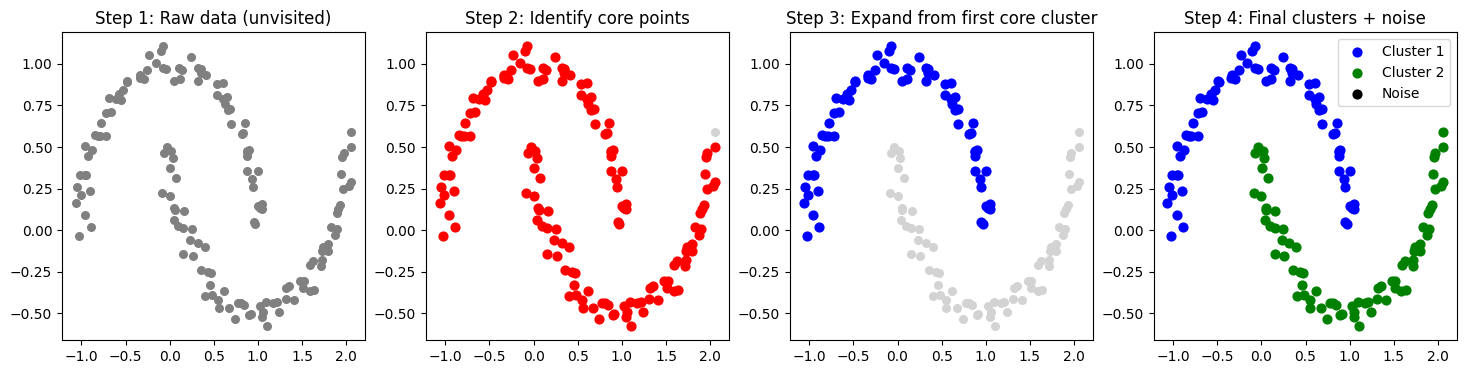

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate toy dataset
X, _ = make_moons(n_samples=150, noise=0.05, random_state=42)

# Parameters
eps = 0.25
minPts = 5

# Run DBSCAN for full result
db = DBSCAN(eps=eps, min_samples=minPts).fit(X)
labels = db.labels_

# Step-by-step visualization of workflow
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Step 1: Raw data
axs[0].scatter(X[:, 0], X[:, 1], c="gray", s=30)
axs[0].set_title("Step 1: Raw data (unvisited)")

# Step 2: Core point identification
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
axs[1].scatter(X[:, 0], X[:, 1], c="lightgray", s=30)
axs[1].scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], c="red", s=40)
axs[1].set_title("Step 2: Identify core points")

# Step 3: Cluster expansion (show clusters growing)
axs[2].scatter(X[:, 0], X[:, 1], c="lightgray", s=30)
axs[2].scatter(X[labels == 0, 0], X[labels == 0, 1], c="blue", s=40)
axs[2].set_title("Step 3: Expand from first core cluster")

# Step 4: Final clusters + noise
axs[3].scatter(X[:, 0], X[:, 1], c="lightgray", s=30)
axs[3].scatter(X[labels == 0, 0], X[labels == 0, 1], c="blue", s=40, label="Cluster 1")
axs[3].scatter(X[labels == 1, 0], X[labels == 1, 1], c="green", s=40, label="Cluster 2")
axs[3].scatter(X[labels == -1, 0], X[labels == -1, 1], c="black", s=40, label="Noise")
axs[3].legend()
axs[3].set_title("Step 4: Final clusters + noise")

plt.show()
